In [1]:
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing import text_dataset_from_directory
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing & preprocessing the dataset

train_ds = text_dataset_from_directory('../neuralnets/aclImdb/train')
test_ds = text_dataset_from_directory('../neuralnets/aclImdb/test')

dfTrain = pd.DataFrame(train_ds.unbatch().as_numpy_iterator(), columns=['text', 'label'])
dfTest = pd.DataFrame(test_ds.unbatch().as_numpy_iterator(), columns=['text', 'label'])
_, xts = train_test_split(dfTest, stratify=dfTest['label'], test_size=0.25)

Found 25001 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


In [2]:
reviews = dfTrain['text'].tolist() + dfTest['text'].tolist()

In [5]:
reviews = [x.decode() for x in reviews]
reviews[:2]

['No scenario, bad actors (poor Melissa Gilbert)... Beurk Beurk Beurk ...<br /><br />Give a such budget to make this... In Belgium, we make ten films which win all prices in Cannes with this.<br /><br />Last time that I\'ve seen a such NULL-Film was Hypercube. But scenario was better.<br /><br />Is anyone knows if the director was a graduate in school-film or a cop ?<br /><br />The better things in this film was the word "End".<br /><br />Why authorize to sell this ? 1ç is to expensive. <br /><br />I\'ve pay ten dollars to buy this.<br /><br />For me, pay for this was my BIG MISTAKE of millennium.<br /><br />Too bad.<br /><br />Next time I\'ll break my arm but buy this type of sh*t.',
 "Before watching this film I had very low expectations and went to just see the cars. Eventually I even regretted going for that reason. Plot is almost non-existent. Character development is non-existent. So many clichés and so much jaw-dropping cheesiness existed in the movie that I could only stare and

In [7]:
from utils import MetricCallback

In [8]:
import re
import matplotlib.pyplot as plt
%matplotlib inline

Loss after epoch 0: 2429543.0
Loss after epoch 1: 2017324.5
Loss after epoch 2: 1788937.5
Loss after epoch 3: 1763698.0
Loss after epoch 4: 1582451.0
Loss after epoch 5: 1547007.0
Loss after epoch 6: 1540789.0
Loss after epoch 7: 1545617.0
Loss after epoch 8: 1525367.0
Loss after epoch 9: 1456916.0
Loss after epoch 10: 1272570.0
Loss after epoch 11: 1360042.0
Loss after epoch 12: 1291810.0
Loss after epoch 13: 1284970.0
Loss after epoch 14: 1288136.0
Loss after epoch 15: 1290810.0
Loss after epoch 16: 1298616.0
Loss after epoch 17: 1262682.0
Loss after epoch 18: 1300502.0
Loss after epoch 19: 1277008.0
Loss after epoch 20: 1274396.0
Loss after epoch 21: 1247176.0
Loss after epoch 22: 1176176.0
Loss after epoch 23: 804404.0
Loss after epoch 24: 820888.0
Loss after epoch 25: 807936.0
Loss after epoch 26: 822888.0
Loss after epoch 27: 826460.0
Loss after epoch 28: 809352.0
Loss after epoch 29: 831380.0
Loss after epoch 30: 827752.0
Loss after epoch 31: 817564.0
Loss after epoch 32: 772792

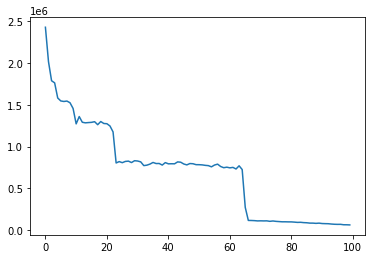

In [11]:
metric = MetricCallback(every=1)
model = Word2Vec(
    sentences = [re.findall(r'\w+', s, flags=re.IGNORECASE) for s in reviews],
    compute_loss=True,
    callbacks=[metric],
    epochs=100,
    min_alpha=0.001,
    vector_size=128,
    workers=9
)
plt.plot(metric.myloss)

In [12]:
model.save('data/imdb-word2vec.w2v')